In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from FeedForwardNeuralNetwork import NeuralNetwork

In [2]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype(int)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Loading MNIST dataset...
Training set: (56000, 784)
Test set: (14000, 784)


In [3]:
def one_hot_encode(y, num_classes=10):
    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_train_encoded = one_hot_encode(y_train)
y_test_encoded = one_hot_encode(y_test)

print(f"Label shape: {y_train_encoded.shape}")
print(f"Sample label: {y_train[0]} -> {y_train_encoded[0]}")

Label shape: (56000, 10)
Sample label: 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
nn = NeuralNetwork(
    layerSizes=[784, 128, 64, 10],
    activations=['relu', 'relu', 'softmax'],
    LossFunction='CrossEntropy',
	optimizer='Adam',
    optimizer_params={'lr': 0.01}
)

print("Neural Network created:")

Neural Network created:


In [5]:
print("Training neural network...")
nn.train(X_train, y_train_encoded, epochs=10)
print("Training complete!")

Training neural network...
Epoch 0, Loss: 0.8462540471707186
Epoch 1, Loss: 0.5628889176542768
Epoch 2, Loss: 0.47089816150909863
Epoch 3, Loss: 0.43156548125529
Epoch 4, Loss: 0.3972445988032978
Epoch 5, Loss: 0.3809074486667347
Epoch 6, Loss: 0.3399237769198191
Epoch 7, Loss: 0.336371697819952
Epoch 8, Loss: 0.312008739778474
Epoch 9, Loss: 0.3080081065916986
Training complete!


In [6]:
def predict(nn, X):
    predictions = []
    for i in range(len(X)):
        output = nn.forward(X[i].reshape(-1, 1))
        pred_class = np.argmax(output)
        predictions.append(pred_class)
    return np.array(predictions)

y_pred = predict(nn, X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.34%


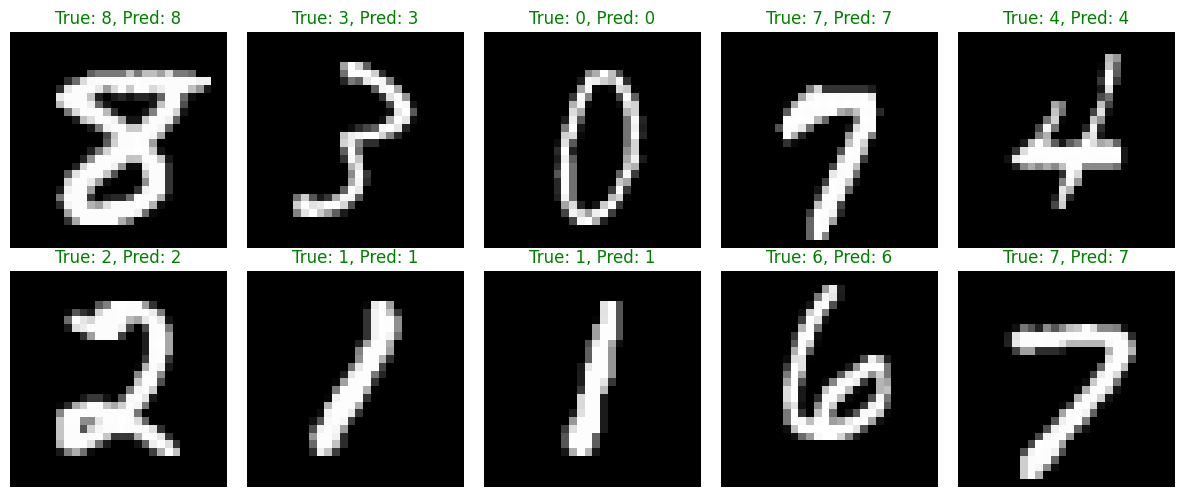

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    idx = i * 10
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
    ax.axis('off')
plt.tight_layout()
plt.show()